### Questions 
* Compare the count of male and female students in the dataset.
* Find out the realtion between parent's education and child's score.
* Find out the relation between parent's marital status and child's score.
* Which ethnic group does most of the childrens belongs to ?

### Insights  
* The number of females in the data is more than the males.
* The education of the parents have a good impact on their children's scores.
* There is negligible impact on the student's score due to their parent's marital status.
* Most of the students are from group C and group D.

### About Dataset

This dataset includes scores from three test scores of students at a (fictional) public school and a variety of personal and socio-economic factors that may have interaction effects upon them.

Remark/warning/disclaimer:

    This datasets are fictional and should be used for educational purposes only.
    The original dataset generator creator is Mr. Royce Kimmons
    There are similar datasets on kaggle already but this one is different and arguably better in two ways.
    -> 1) has more data (>30k instead of just the 1k the other datasets have),
    -> 2) has extended datasets with more features (15 instead of 9) and has missing values which makes it ideal for data cleaning and data preprocessing.



### Data Dictionary (column description)

- Gender: Gender of the student (male/female)
- EthnicGroup: Ethnic group of the student (group A to E)
- ParentEduc: Parent(s) education background (from some_highschool to master's degree)
- LunchType: School lunch type (standard or free/reduced)
- TestPrep: Test preparation course followed (completed or none)
- ParentMaritalStatus: Parent(s) marital status (married/single/widowed/divorced)
- PracticeSport: How often the student parctice sport (never/sometimes/regularly))
- IsFirstChild: If the child is first child in the family or not (yes/no)
- NrSiblings: Number of siblings the student has (0 to 7)
- TransportMeans: Means of transport to school (schoolbus/private)
- WklyStudyHours: Weekly self-study hours(less that 5hrs; between 5 and 10hrs; more than 10hrs)
- MathScore: math test score(0-100)
- ReadingScore: reading test score(0-100)
- WritingScore: writing test score(0-100)

### Analytics questions:

- What factors (features) affect test scores most?
- Are there interacting features which affect test scores?

In [1]:
#pip install numpy
#pip install pandas
#pip install  matplotlib
#pip install Seaborn


In [2]:
# Importing librearies

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
# Fatching data of CSV file

df=pd.read_csv(r"C:\Users\LENOVO\Desktop\skill\skilled up class python\Expanded_data_with_more_features.csv")  # this is available in kaggle
df.head()

# Example if you have same file in your local PC then follow this. 

#df=pd.read_csv('C:\\Users\\shashi\\Expanded_data_with_more_features.csv') 
# or 
# df=pd.read_csv(r'C:\Users\shashi\Expanded_data_with_more_features.csv') 

,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75


In [5]:
# Discrived most comman required of all numeric data 
df.describe()

,Unnamed: 0,MathScore,ReadingScore,WritingScore
count,30641.000000,30641.000000,30641.000000,30641.000000
mean,499.556607,66.749355,69.624980,68.468327
std,288.747894,15.206049,14.671572,15.307814
min,0.000000,0.000000,10.000000,5.000000
25%,249.000000,56.000000,60.000000,58.000000
50%,500.000000,67.000000,70.000000,69.000000
75%,750.000000,78.000000,80.000000,79.000000
max,999.000000,100.000000,100.000000,100.000000


In [6]:
# Get the info of all column data 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30641 entries, 0 to 30640
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    30641 non-null  int64 
 1   Gender        30641 non-null  object
 2   EthnicGroup   30641 non-null  object
 3   ParentEduc    30641 non-null  object
 4   LunchType     30641 non-null  object
 5   TestPrep      30641 non-null  object
 6   MathScore     30641 non-null  int64 
 7   ReadingScore  30641 non-null  int64 
 8   WritingScore  30641 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 2.1+ MB


In [25]:
# Display the count of null in each coumns
df.isnull().sum()

Unnamed: 0                0
Gender                    0
EthnicGroup            1840
ParentEduc             1845
LunchType                 0
TestPrep               1830
ParentMaritalStatus    1190
PracticeSport           631
IsFirstChild            904
NrSiblings             1572
TransportMeans         3134
WklyStudyHours          955
MathScore                 0
ReadingScore              0
WritingScore              0
dtype: int64

In [8]:
# Display top 5 rows details of data by default
df.head()

,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,MathScore,ReadingScore,WritingScore
0,0,female,group B,bachelor's degree,standard,none,72,72,74
1,1,female,group C,some college,standard,completed,69,90,88
2,2,female,group B,master's degree,standard,none,90,95,93
3,3,male,group A,associate's degree,free/reduced,none,47,57,44
4,4,male,group C,some college,standard,none,76,78,75


In [9]:
# display the no row of data as per your need 
n = 10    # n is variable to store any number 
df.head(n) # here n will display rows equivalent to value of n 

,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,MathScore,ReadingScore,WritingScore
0,0,female,group B,bachelor's degree,standard,none,72,72,74
1,1,female,group C,some college,standard,completed,69,90,88
2,2,female,group B,master's degree,standard,none,90,95,93
3,3,male,group A,associate's degree,free/reduced,none,47,57,44
4,4,male,group C,some college,standard,none,76,78,75
5,5,female,group B,associate's degree,standard,none,71,83,78
6,6,female,group B,some college,standard,completed,88,95,92
7,7,male,group B,some college,free/reduced,none,40,43,39
8,8,male,group D,high school,free/reduced,completed,64,64,67
9,9,female,group B,high school,free/reduced,none,38,60,50


In [10]:
# droping data 

df=df.drop("Unnamed: 0",axis=1) # "Unnamed: 0" is column name which we want to delete and "axis=1" means column, "axis=0" means row  
df.head()

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,MathScore,ReadingScore,WritingScore
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


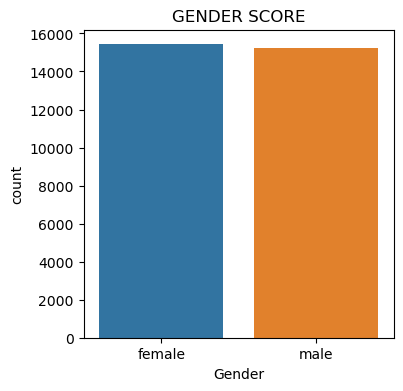

In [11]:
#gender distribution
plt.figure(figsize=(4,4))
plt.title("GENDER SCORE")
ax=sns.countplot(data=df,x="Gender")
# ax.bar_label(ax.containers[0])
# plt.show()

The number of females in the data is more than the males.

In [12]:
gb=df.groupby("ParentEduc").agg({"MathScore":"mean","ReadingScore":"mean","WritingScore":"mean"})
gb

,MathScore,ReadingScore,WritingScore
ParentEduc,,,
associate's degree,68.527787,71.368350,70.374619
bachelor's degree,70.635000,73.375556,73.423611
high school,64.670038,67.522467,65.565909
master's degree,72.168137,75.202044,75.246168
some college,66.603434,69.528093,68.653661
some high school,62.926359,65.826816,63.815473


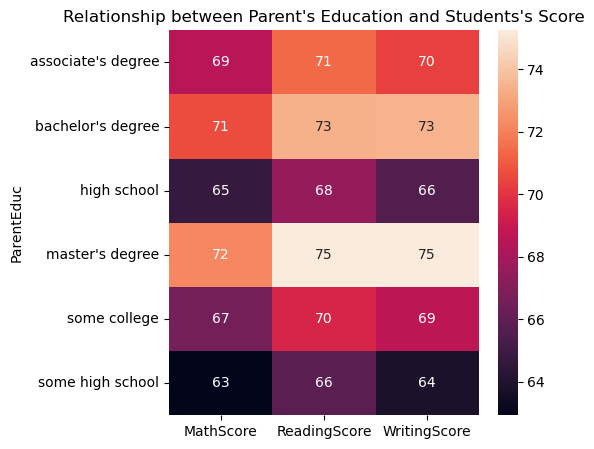

In [13]:
plt.figure(figsize=(5,5))
sns.heatmap(gb,annot=True)
plt.title("Relationship between Parent's Education and Students's Score")
plt.show()

The education of the parents have a good impact on their children's scores.

In [18]:
gb1=df.groupby('ParentMaritalStatus').agg({'MathScore':'mean','ReadingScore':'mean','WritingScore':'mean'})
gb1

,MathScore,ReadingScore,WritingScore
ParentMaritalStatus,,,
divorced,66.691197,69.655011,68.799146
married,66.657326,69.389575,68.420981
single,66.165704,69.157250,68.174440
widowed,67.368866,69.651438,68.563452


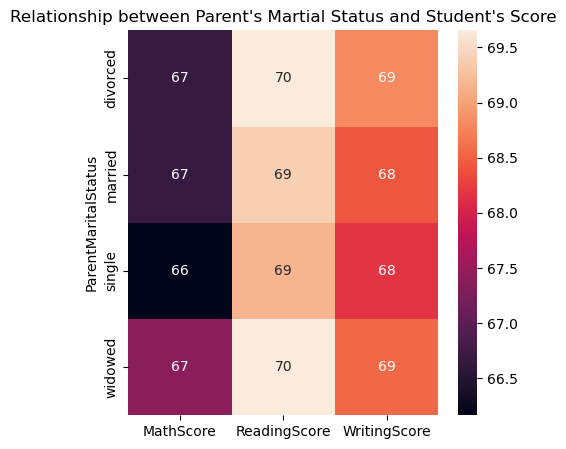

In [19]:
plt.figure(figsize=(5,5))
sns.heatmap(gb1,annot=True)
plt.title("Relationship between Parent's Martial Status and Student's Score")
plt.grid(False)
plt.show()

There is negligible impact on the student's score due to their parent's marital status.

In [20]:
df['EthnicGroup'].unique()

array([nan, 'group C', 'group B', 'group A', 'group D', 'group E'],
      dtype=object)

In [21]:
groupA=df.loc[(df['EthnicGroup']=='group A')].count()
groupB=df.loc[(df['EthnicGroup']=='group B')].count()
groupC=df.loc[(df['EthnicGroup']=='group C')].count()
groupD=df.loc[(df['EthnicGroup']=='group D')].count()
groupE=df.loc[(df['EthnicGroup']=='group E')].count()

print(groupA)
print()

print(groupB)
print()

print(groupC)
print()

print(groupD)
print()

print(groupE)

Unnamed: 0             2219
Gender                 2219
EthnicGroup            2219
ParentEduc             2078
LunchType              2219
TestPrep               2081
ParentMaritalStatus    2121
PracticeSport          2167
IsFirstChild           2168
NrSiblings             2096
TransportMeans         1999
WklyStudyHours         2146
MathScore              2219
ReadingScore           2219
WritingScore           2219
dtype: int64

Unnamed: 0             5826
Gender                 5826
EthnicGroup            5826
ParentEduc             5470
LunchType              5826
TestPrep               5488
ParentMaritalStatus    5605
PracticeSport          5704
IsFirstChild           5649
NrSiblings             5546
TransportMeans         5238
WklyStudyHours         5642
MathScore              5826
ReadingScore           5826
WritingScore           5826
dtype: int64

Unnamed: 0             9212
Gender                 9212
EthnicGroup            9212
ParentEduc             8652
LunchType           

In [22]:
print(groupA['EthnicGroup'])
print(groupB['EthnicGroup'])
print(groupC['EthnicGroup'])
print(groupD['EthnicGroup'])
print(groupE['EthnicGroup'])

2219
5826
9212
7503
4041


In [23]:
l=['group A','group B','group C','group D','group E']
mylist=[groupA['EthnicGroup'],groupB['EthnicGroup'],groupC['EthnicGroup'],groupD['EthnicGroup'],groupE['EthnicGroup']]
print(l)
print(mylist)

['group A', 'group B', 'group C', 'group D', 'group E']
[2219, 5826, 9212, 7503, 4041]


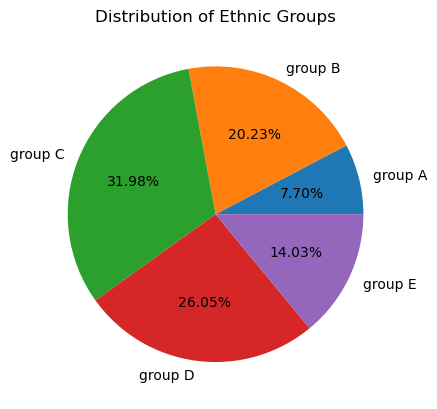

In [24]:
plt.pie(mylist,labels=l,autopct='%1.2f%%')
plt.title('Distribution of Ethnic Groups')
plt.show()

Most of the students are from group C and group D